In [1]:
from google.colab import drive
drive.mount("/content/drive", )


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pwd

/content


In [5]:
!ls

drive  sample_data


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [1]:
import pandas as pd

trans = pd.read_csv('/content/drive/MyDrive/HI-Medium_Trans.csv')
trans.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:17,20,800104D70,20,800104D70,6794.63,US Dollar,6794.63,US Dollar,Reinvestment,0
1,2022/09/01 00:02,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/09/01 00:17,1208,80010E430,1208,80010E430,1880.23,US Dollar,1880.23,US Dollar,Reinvestment,0
3,2022/09/01 00:03,1208,80010E650,20,80010E6F0,73966883.00,US Dollar,73966883.00,US Dollar,Cheque,0
4,2022/09/01 00:02,1208,80010E650,20,80010EA30,45868454.00,US Dollar,45868454.00,US Dollar,Cheque,0


In [2]:
sample = trans.sample(n=10000, random_state=42).reset_index(drop=True)
sample.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/07 02:50,22794,8025B4DE0,217066,8390B6DF0,14.95,Euro,14.95,Euro,Cash,0
1,2022/09/07 18:18,70,100428660,282271,8433416E0,658.03,US Dollar,658.03,US Dollar,Cheque,0
2,2022/09/01 18:32,125872,83DA9B2C0,125872,83DA9B2C0,1797.42,US Dollar,1533.92,Euro,ACH,0
3,2022/09/08 03:07,138605,80F99FFA0,72442,822DE6B30,109501.01,Euro,109501.01,Euro,Cheque,0
4,2022/09/05 19:33,70,1004286F0,1101212,847F108A0,634.45,Yuan,634.45,Yuan,Credit Card,0


In [3]:
sample.to_csv('sample.csv', index=False)


In [4]:
#Check for missing values
sample.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [5]:
#Checking for dtypes
sample.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [6]:
#Convert timestamp to datetime
sample['Timestamp'] = pd.to_datetime(sample['Timestamp'])
sample.dtypes

Timestamp             datetime64[ns]
From Bank                      int64
Account                       object
To Bank                        int64
Account.1                     object
Amount Received              float64
Receiving Currency            object
Amount Paid                  float64
Payment Currency              object
Payment Format                object
Is Laundering                  int64
dtype: object

In [7]:
sample.describe()

,Timestamp,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,10000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,2022-09-08 14:35:07.248000,3.020368e+05,4.135537e+05,9.154104e+06,9.120547e+06,0.001200
min,2022-09-01 00:00:00,0.000000e+00,0.000000e+00,1.000000e-06,2.000000e-06,0.000000
25%,2022-09-03 14:45:00,3.223250e+03,2.662825e+04,2.095025e+02,2.097375e+02,0.000000
50%,2022-09-08 10:28:30,4.747450e+04,1.464430e+05,1.483670e+03,1.479210e+03,0.000000
75%,2022-09-13 08:49:15,2.172860e+05,2.599880e+05,1.159724e+04,1.156104e+04,0.000000
max,2022-09-17 08:42:00,3.225002e+06,3.214377e+06,5.553053e+10,5.553053e+10,1.000000
std,NaN,6.134252e+05,6.585613e+05,5.664986e+08,5.664940e+08,0.034622


In [8]:
sample['Year']= sample['Timestamp'].dt.year
sample['Month'] = sample['Timestamp'].dt.month
sample['Day'] = sample['Timestamp'].dt.day_name()
sample['Time'] = sample['Timestamp'].dt.time

sample = sample.drop('Timestamp', axis =1)
sample.head()

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Year,Month,Day,Time
0,22794,8025B4DE0,217066,8390B6DF0,14.95,Euro,14.95,Euro,Cash,0,2022,9,Wednesday,02:50:00
1,70,100428660,282271,8433416E0,658.03,US Dollar,658.03,US Dollar,Cheque,0,2022,9,Wednesday,18:18:00
2,125872,83DA9B2C0,125872,83DA9B2C0,1797.42,US Dollar,1533.92,Euro,ACH,0,2022,9,Thursday,18:32:00
3,138605,80F99FFA0,72442,822DE6B30,109501.01,Euro,109501.01,Euro,Cheque,0,2022,9,Thursday,03:07:00
4,70,1004286F0,1101212,847F108A0,634.45,Yuan,634.45,Yuan,Credit Card,0,2022,9,Monday,19:33:00


In [9]:
sample.dtypes

From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
Year                    int32
Month                   int32
Day                    object
Time                   object
dtype: object

In [10]:
sample['Month'].value_counts()
sample['Day'].value_counts()

Day
Friday       2694
Thursday     2574
Monday       1265
Tuesday      1240
Wednesday    1184
Sunday        537
Saturday      506
Name: count, dtype: int64

In [11]:
sample['Receiving Currency'].value_counts()

Receiving Currency
US Dollar            3668
Euro                 2220
Yuan                  694
Shekel                465
Canadian Dollar       354
UK Pound              313
Ruble                 295
Australian Dollar     292
Yen                   285
Mexican Peso          282
Swiss Franc           280
Rupee                 243
Bitcoin               225
Brazil Real           212
Saudi Riyal           172
Name: count, dtype: int64

In [12]:
sample['Payment Format'].value_counts()

Payment Format
Cheque          3806
Credit Card     2832
ACH             1195
Cash            1008
Reinvestment     565
Wire             373
Bitcoin          221
Name: count, dtype: int64

In [13]:
sample['Is Laundering'].value_counts()

Is Laundering
0    9988
1      12
Name: count, dtype: int64

## EDA

In [16]:
# Create the Plotly figure
fig = go.Figure()

# Iterate through the unique payment currencies and add a trace for each
for currency in sample['Payment Currency'].unique():
    currency_data = sample[sample['Payment Currency'] == currency]
    fig.add_trace(go.Bar(
        x=sample['Day'].unique(),
        y=currency_data.groupby('Day')['Amount Paid'].mean(),
        name=currency,
        hovertemplate='<b>%{x}</b><br>Amount Paid: %{y:.2f}<br>Payment Currency: %{name}'
    ))

# Customize the Plotly figure
fig.update_layout(
    title='Bar Plot of Amount Paid by Day and Payment Currency',
    xaxis_title='Day',
    yaxis_title='Amount Paid',
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

# Display the Plotly figure
fig.show()

In [17]:
#Currency plots
fig = px.bar(sample, x='Day', color='Amount Paid', title='Count Plot')
fig.show()

In [18]:
fig = px.bar(sample, x='Day', title='Count Plot of days')
fig.show()

In [19]:
fig = px.bar(sample, x='Payment Format', title='Count Plot of Payment Format',color_continuous_scale='Set1')
fig.show()

### Modelling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
#Label Encoding

sample['Receiving Currency'] = le.fit_transform(sample['Receiving Currency'])
sample['Payment Currency'] = le.fit_transform(sample['Payment Currency'])
sample['Payment Format'] = le.fit_transform(sample['Payment Format'])
sample['Day'] = le.fit_transform(sample['Day'])
sample['Account'] = le.fit_transform(sample['Account'])
sample['Account.1'] = le.fit_transform(sample['Account.1'])

sample.head()

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Year,Month,Day,Time
0,22794,963,217066,6952,14.95,4,14.95,4,2,0,2022,9,6,02:50:00
1,70,0,282271,8198,658.03,12,658.03,12,3,0,2022,9,6,18:18:00
2,125872,7727,125872,7506,1797.42,12,1533.92,4,0,0,2022,9,4,18:32:00
3,138605,3511,72442,4302,109501.01,4,109501.01,4,3,0,2022,9,4,03:07:00
4,70,2,1101212,8757,634.45,14,634.45,14,4,0,2022,9,1,19:33:00


In [25]:
X = sample.drop(['Is Laundering','Time'], axis=1)
y = sample['Is Laundering']

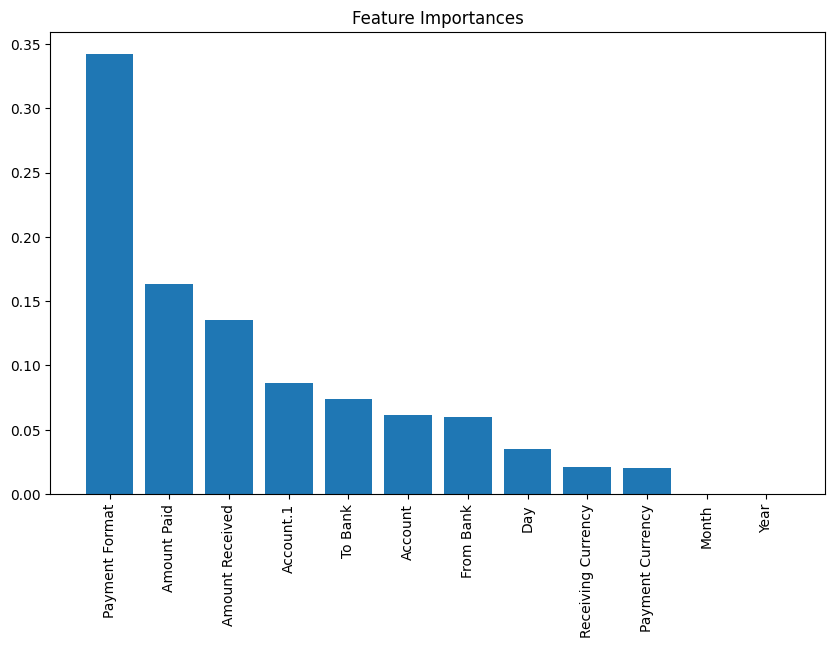

In [26]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Sort the importances and get the feature names
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
feature_names = [X.columns[i] for i in sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), sorted_importances)
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.title("Feature Importances")
plt.show()

In [27]:
#Convert all integers to float dtypes
float_array = sample[['Year','Month','From Bank','To Bank']].values.astype(float)

Modelling

In [28]:
X = sample.drop(['Is Laundering','Time','Year','Month'], axis=1)
y = sample['Is Laundering']

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report,roc_auc_score,roc_curve,auc,mean_absolute_error,precision_score,recall_score,f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

In [31]:
rf = RandomForestClassifier(class_weight='balanced')
svc = SVC(probability =True)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
nb = MultinomialNB()
lr = LogisticRegression(solver='liblinear')

### Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       0.00      0.00      0.00         2

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

mean absolute error: 0.001
Accuracy: 0.999
AUC: 0.4794794794794795


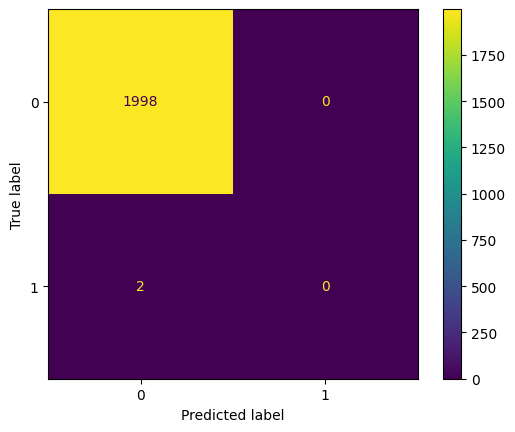

In [32]:
rf.fit(X_train, y_train)
predict = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Print the classification report with zero_division='warn'
print(classification_report(y_test, predict, zero_division='warn'))

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, predict)).plot()

# Print the mean absolute error
print('mean absolute error:', mean_absolute_error(y_test, predict))

# Calculate the accuracy score
rf_score = accuracy_score(y_test, predict)
print('Accuracy:', rf_score)

# Calculate the ROC curve and AUC with zero_division='warn'
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1, drop_intermediate=False)
roc_rf = auc(fpr, tpr)
print('AUC:', roc_rf)

### Class Balancing using SMOTE

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       0.00      0.00      0.00         2

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

mean absolute error: 0.004
Accuracy: 0.996
AUC: 0.7147147147147147


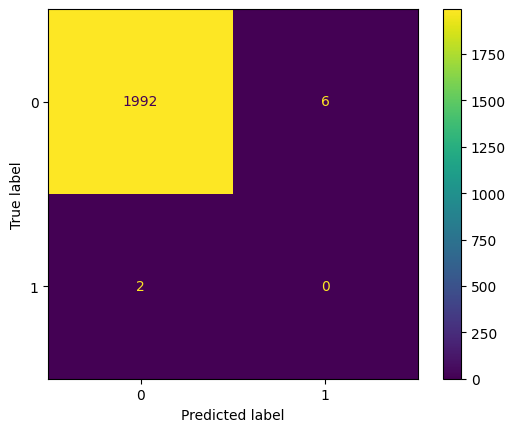

In [34]:
from imblearn.over_sampling import SMOTE

# Resample the training data using SMOTE
sm = SMOTE()
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Fit the model on the resampled training data
rf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the original test set
predict = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Print the classification report with zero_division='warn'
print(classification_report(y_test, predict, zero_division='warn'))

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, predict)).plot()

# Print the mean absolute error
print('mean absolute error:', mean_absolute_error(y_test, predict))

# Calculate the accuracy score
rf_score = accuracy_score(y_test, predict)
print('Accuracy:', rf_score)

# Calculate the ROC curve and AUC with zero_division='warn'
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1, drop_intermediate=False)
roc_rf = auc(fpr, tpr)
print('AUC:', roc_rf)

In [35]:
param_grid = {
              'n_estimators': [200, 2000, 100],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
               'max_depth': [3, 5]
        }

grid_rf = GridSearchCV(rf, param_grid,n_jobs=-1,verbose=2,cv=3)
grid_rf.fit(X_train_resampled, y_train_resampled)
print(grid_rf.best_params_)




Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [36]:
# fit by setting best parameters and Evaluate model
rf = RandomForestClassifier(max_depth= 5, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('mean absolute error:', mean_absolute_error(y_test,y_pred))
rf_score = accuracy_score(y_test, y_pred)
print('Accuracy:', rf_score)

grid_predictions = grid_rf.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1, drop_intermediate=False)
roc_rf = auc(fpr, tpr)
print('AUC:', roc_rf)

mean absolute error: 0.001
Accuracy: 0.999
[[1954   44]
 [   1    1]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1998
           1       0.02      0.50      0.04         2

    accuracy                           0.98      2000
   macro avg       0.51      0.74      0.52      2000
weighted avg       1.00      0.98      0.99      2000

AUC: 0.7147147147147147


Xgboost

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       0.00      0.00      0.00         2

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Mean absolute error: 0.001
Accuracy: 0.999
AUC: 0.7892892892892893


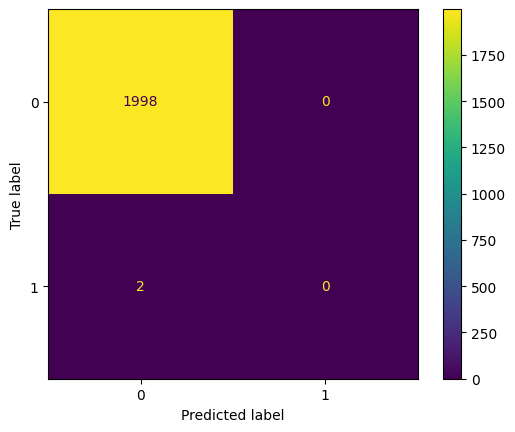

In [37]:
xgb.fit(X_train,y_train)
xgb_predict = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]
print(classification_report(y_test, xgb_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, xgb_predict)).plot()
print('Mean absolute error:', mean_absolute_error(y_test,xgb_predict))
xgb_score = accuracy_score(y_test,xgb_predict)
print('Accuracy:', xgb_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_xgb = auc(fpr, tpr)
print('AUC:', roc_xgb)

## OVERSAMPLING USING SMOTE

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       0.00      0.00      0.00         2

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.996
AUC: 0.7147147147147147


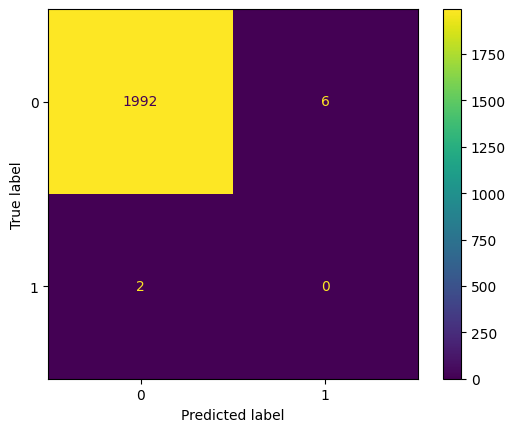

In [38]:
from imblearn.over_sampling import SMOTE

# Resample the training data using SMOTE
sm = SMOTE()
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Fit the model on the resampled training data
xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the original test set
predict = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

# Print the classification report with zero_division='warn'
print(classification_report(y_test, predict, zero_division='warn'))

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, predict)).plot()

# Calculate the accuracy score
xgb_score = accuracy_score(y_test, predict)
print('Accuracy:', xgb_score)

# Calculate the ROC curve and AUC with zero_division='warn'
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1, drop_intermediate=False)
roc_xgb = auc(fpr, tpr)
print('AUC:', roc_rf)

In [39]:
grid_params = {
              'max_depth': [3,5],
              'min_child_weight': [1, 5, 10],
              'n_estimators': range(0,100,50),
              'learning_rate': [0.1, 0.01, 0.05],
               'gamma': [0.5, 1],
              'subsample': [0.6, 0.8, 1.0],
}

grid_model = GridSearchCV(xgb,grid_params, scoring = 'accuracy', n_jobs = 1,cv = 5,verbose=2)
grid_model.fit(X_train_resampled, y_train_resampled)
print(grid_model.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.6; total time=   0.1s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.6; total time=   0.1s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.6; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.6; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.6; total time=   0.2s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.8; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.8; total time=   0.2s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimato

In [40]:
# fit by setting best parameters and Evaluate model
xgb = XGBClassifier(gamma= 0.5, learning_rate= 0.1, max_depth= 5, min_child_weight=1, n_estimators= 50, subsample = 0.8)

xgb.fit(X_train_resampled, y_train_resampled)
y_pred = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, y_pred)
print('Accuracy:', xgb_score)

grid_predictions = grid_model.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1, drop_intermediate=False)
roc_xgb = auc(fpr, tpr)
print('AUC:', roc_xgb)

Accuracy: 0.987
[[1974   24]
 [   2    0]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1998
           1       0.00      0.00      0.00         2

    accuracy                           0.99      2000
   macro avg       0.50      0.49      0.50      2000
weighted avg       1.00      0.99      0.99      2000

AUC: 0.8901401401401401


## Oversampling using IMBLEARN

In [41]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))


Original dataset shape Counter({0: 9988, 1: 12})
Resample dataset shape Counter({0: 9988, 1: 9988})


In [42]:
grid_params = {
              'max_depth': [3,5],
              'min_child_weight': [1, 5, 10],
              'n_estimators': range(0,100,50),
              'learning_rate': [0.1, 0.01, 0.05],
               'gamma': [0.5, 1],
              'subsample': [0.6, 0.8, 1.0],
}

grid_model = GridSearchCV(xgb,grid_params, scoring = 'accuracy', n_jobs = 1,cv = 5,verbose=2)
grid_model.fit(X_ros, y_ros)
print(grid_model.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.6; total time=   0.1s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.6; total time=   0.0s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.6; total time=   0.0s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.6; total time=   0.0s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.6; total time=   0.0s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.8; total time=   0.0s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=0, subsample=0.8; total time=   0.0s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimato

In [45]:
# fit by setting best parameters and Evaluate model
xgb = XGBClassifier(gamma= 0.5, learning_rate= 0.1, max_depth= 5, min_child_weight=1, n_estimators= 50, subsample = 0.8)

xgb.fit(X_ros, y_ros)
y_pred = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, y_pred)
print('Accuracy:', xgb_score)

grid_predictions = grid_model.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1, drop_intermediate=False)
roc_xgb = auc(fpr, tpr)
print('AUC:', roc_xgb)

Accuracy: 0.9945
[[1987   11]
 [   0    2]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1998
           1       0.15      1.00      0.27         2

    accuracy                           0.99      2000
   macro avg       0.58      1.00      0.63      2000
weighted avg       1.00      0.99      1.00      2000

AUC: 0.8901401401401401


### XGBoost, RandomForest, and ExtraTrees,KNN,SVC classifiers

In [46]:
def fit_classification_models(X, y, test_size=0.2, random_state=42):

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create pipelines for XGBoost, RandomForest, and ExtraTrees classifiers
    pipelines = {
        'XGBoost': Pipeline([('scaler', RobustScaler()), ('classifier', XGBClassifier())]),
        'Random Forest': Pipeline([('scaler', RobustScaler()), ('classifier', RandomForestClassifier())]),
        'ExtraTreesClassifier': Pipeline([('scaler', RobustScaler()), ('classifier', ExtraTreesClassifier())]),
        'LogisticRegression':Pipeline([('scaler', RobustScaler()), ('classifier', LogisticRegression())]),
        'KNeighborsClassifier':Pipeline([('scaler', RobustScaler()), ('classifier', KNeighborsClassifier())]),
        'SVC':Pipeline([('scaler', RobustScaler()), ('classifier', SVC())]),
    }

    # Fit and evaluate XGBoost, RandomForest, and ExtraTrees classifiers
    results = {}

    for classifier_name, pipeline in pipelines.items():
        pipeline.fit(X_train, y_train)

        # Training results
        y_train_pred = pipeline.predict(X_train)
        train_precision = round(precision_score(y_train, y_train_pred, average="weighted") * 100, 1)
        train_recall = round(recall_score(y_train, y_train_pred, average="weighted") * 100, 1)
        train_f1 = round(f1_score(y_train, y_train_pred, average="weighted") * 100, 1)
        train_conf_matrix = confusion_matrix(y_train, y_train_pred)
        train_classification_report = classification_report(y_train, y_train_pred, output_dict=True)

        # Testing results
        y_test_pred = pipeline.predict(X_test)
        test_precision = round(precision_score(y_test, y_test_pred, average="weighted") * 100, 1)
        test_recall = round(recall_score(y_test, y_test_pred, average="weighted") * 100, 1)
        test_f1 = round(f1_score(y_test, y_test_pred, average="weighted") * 100, 1)
        test_conf_matrix = confusion_matrix(y_test, y_test_pred)
        test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)

        results[classifier_name] = {
            'training': {
                'precision': train_precision,
                'recall': train_recall,
                'f1-score': train_f1,
                'confusion_matrix': train_conf_matrix,
                'classification_report': train_classification_report
            },
            'testing': {
                'precision': test_precision,
                'recall': test_recall,
                'f1-score': test_f1,
                'confusion_matrix': test_conf_matrix,
                'classification_report': test_classification_report
            }
        }

    return results

Algorithm: XGBoost
      Metric  Training  Testing
0  Precision     100.0     99.9
1     Recall     100.0     99.9
2   F1-score     100.0     99.9




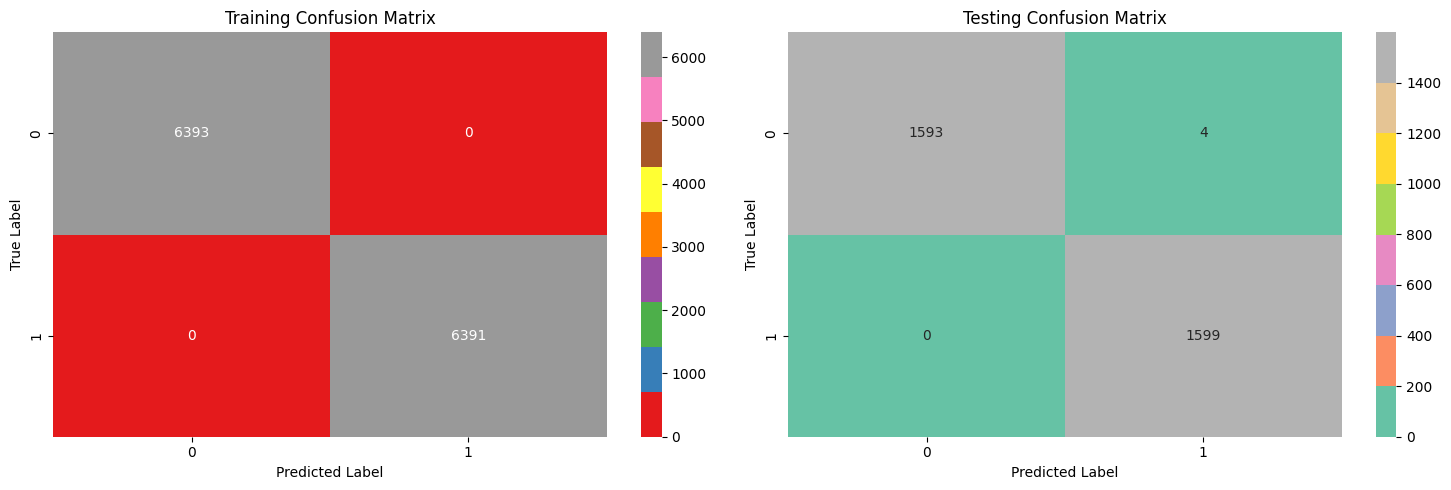

Algorithm: Random Forest
      Metric  Training  Testing
0  Precision     100.0     99.8
1     Recall     100.0     99.8
2   F1-score     100.0     99.8




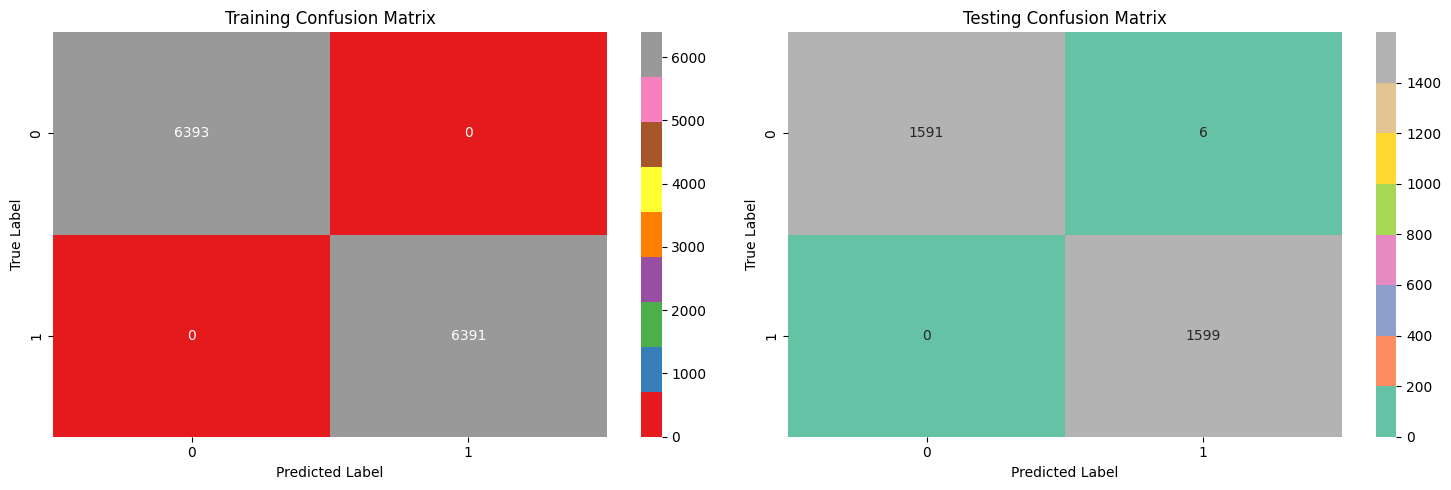

Algorithm: ExtraTreesClassifier
      Metric  Training  Testing
0  Precision     100.0    100.0
1     Recall     100.0    100.0
2   F1-score     100.0    100.0




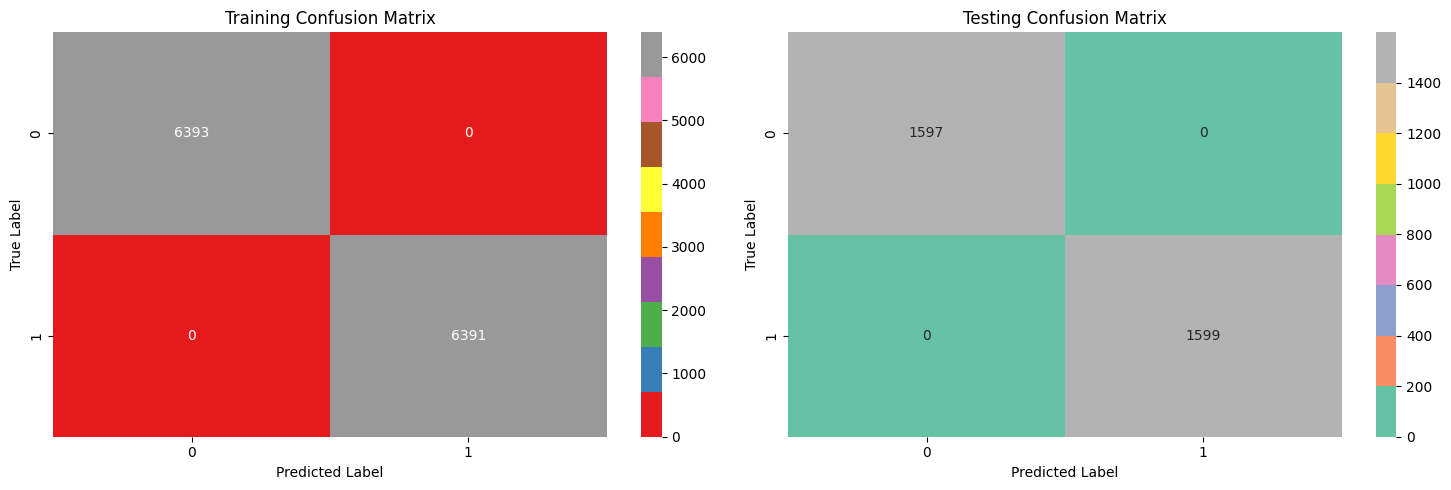

Algorithm: LogisticRegression
      Metric  Training  Testing
0  Precision      96.2     96.3
1     Recall      95.9     96.1
2   F1-score      95.9     96.1




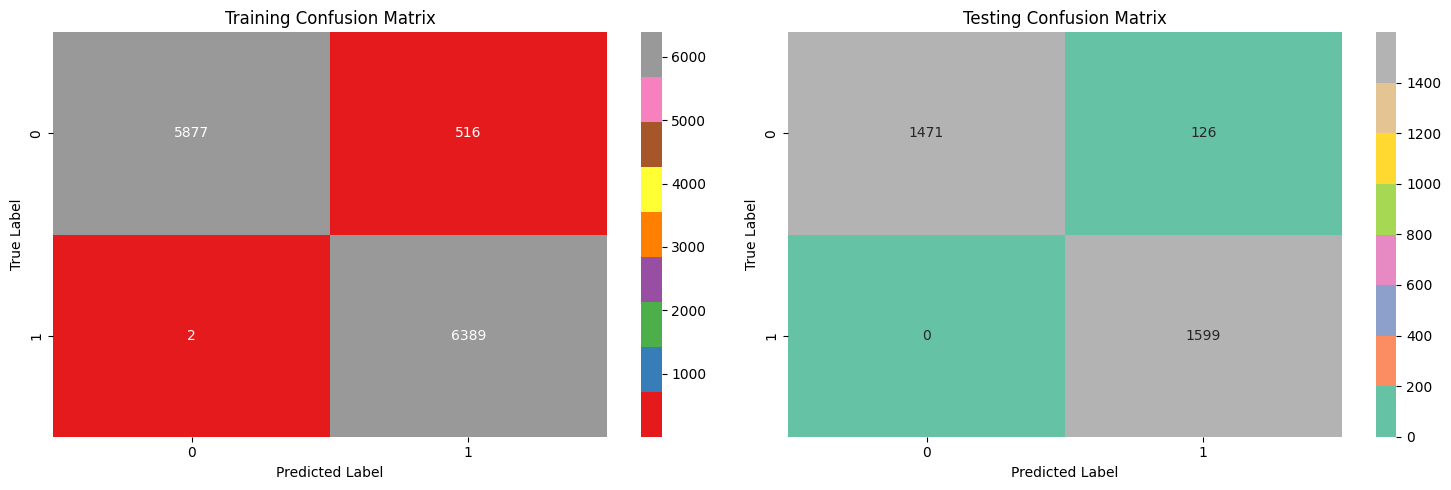

Algorithm: KNeighborsClassifier
      Metric  Training  Testing
0  Precision      99.5     99.3
1     Recall      99.5     99.2
2   F1-score      99.5     99.2




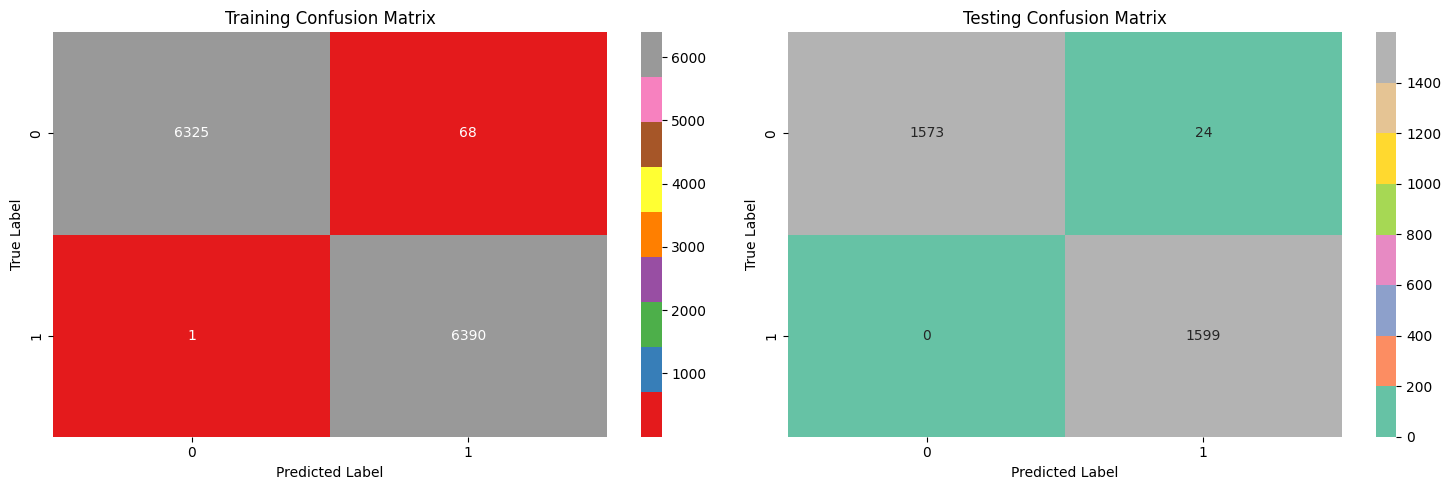

Algorithm: SVC
      Metric  Training  Testing
0  Precision      75.0     75.1
1     Recall      50.2     50.3
2   F1-score      33.7     34.1




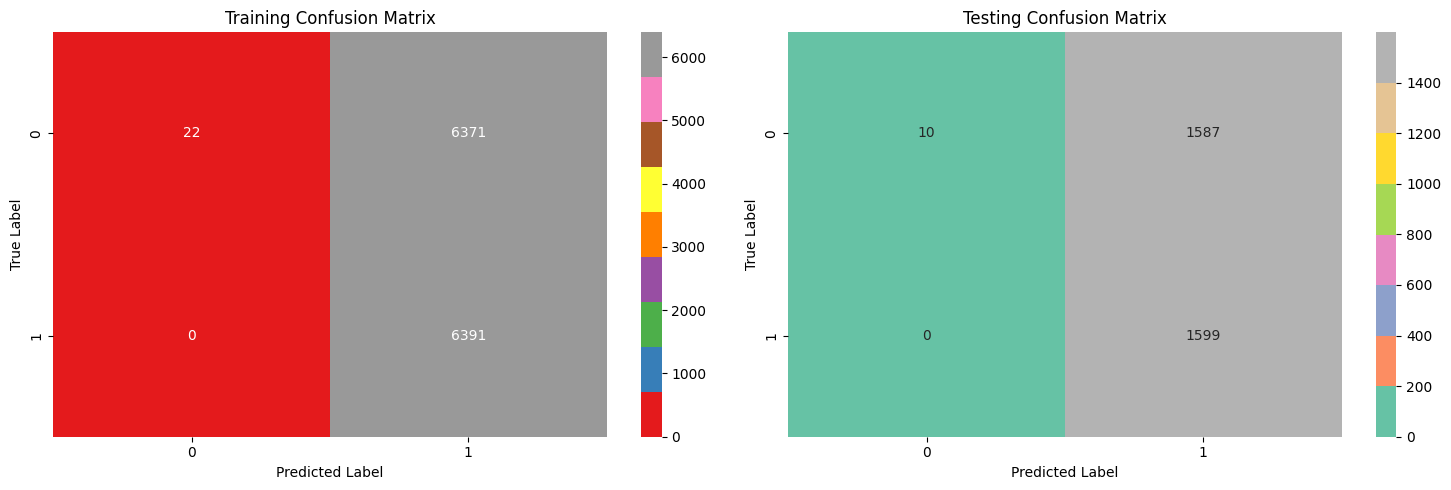

In [47]:
# Call fit_classification_models() function to generate results
results = fit_classification_models(X_train_resampled, y_train_resampled)

# Plot confusion matrices and display DataFrame for each algorithm
for classifier_name, metrics in results.items():
    print(f"Algorithm: {classifier_name}")

    # Display DataFrame
    df = pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1-score'],
        'Training': [metrics['training']['precision'], metrics['training']['recall'], metrics['training']['f1-score']],
        'Testing': [metrics['testing']['precision'], metrics['testing']['recall'], metrics['testing']['f1-score']]
    })
    print(df)
    print("\n")

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Training confusion matrix
    sns.heatmap(metrics['training']['confusion_matrix'], annot=True, fmt='d', cmap='Set1', ax=axes[0])
    axes[0].set_title('Training Confusion Matrix')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    # Testing confusion matrix
    sns.heatmap(metrics['testing']['confusion_matrix'], annot=True, fmt='d', cmap='Set2', ax=axes[1])
    axes[1].set_title('Testing Confusion Matrix')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

In [48]:
# Initialize a list to store the scores
all_scores = []

# Iterate over the results
for classifier_name, metrics in results.items():
    # Append the scores to the list
    all_scores.append({
        'Algorithm': classifier_name,
        'Training Precision': metrics['training']['precision'],
        'Testing Precision': metrics['testing']['precision'],
        'Training Recall': metrics['training']['recall'],
        'Testing Recall': metrics['testing']['recall'],
        'Training F1-score': metrics['training']['f1-score'],
        'Testing F1-score': metrics['testing']['f1-score']
    })

# Create a DataFrame from the scores list
scores_df = pd.DataFrame(all_scores)

# Sort the DataFrame by the 'Testing F1-score' column in descending order
scores_sorted = scores_df.sort_values(by='Testing F1-score', ascending=False)

# Display the sorted DataFrame
scores_sorted

,Algorithm,Training Precision,Testing Precision,Training Recall,Testing Recall,Training F1-score,Testing F1-score
2,ExtraTreesClassifier,100.0,100.0,100.0,100.0,100.0,100.0
0,XGBoost,100.0,99.9,100.0,99.9,100.0,99.9
1,Random Forest,100.0,99.8,100.0,99.8,100.0,99.8
4,KNeighborsClassifier,99.5,99.3,99.5,99.2,99.5,99.2
3,LogisticRegression,96.2,96.3,95.9,96.1,95.9,96.1
5,SVC,75.0,75.1,50.2,50.3,33.7,34.1


## Using Xgboost as final Model

In [49]:
# Spliting the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Define and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# predictions
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

# Evaluate the model using F1 score
train_f1_score = f1_score(y_train, pred_train)
test_f1_score = f1_score(y_test, pred_test)

print('Train_f1_score:', train_f1_score)
print('Test_f1_score:', test_f1_score)

Train_f1_score: 1.0
Test_f1_score: 0.9987507807620237


In [50]:
pred_test = xgb_model.predict(X_test)
print(pred_test[:20])

[1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1]
